## Barratt Impulsiveness Scale (Self Control Measure) as a predictor of the number of car crashes
**This is private data. Please do not share**

* Date: 2017 - 11 - 25
* Version: 1 
* Editors: Fionn Delahunty 

------- 
This notebook (R code) investigates if Barratt Impulsiveness Scale (BIS) self control measure is a predictor of the number of car crashes in the sample data. 

Summary of steps
1. Dataset import 
2. Testing distribution of self control measure 
3. Testing distribution of car crash measure 
4. Investigating predictor 
5. Summary
------


### 1. Dataset Import

In [80]:
# Dataset Import 
data <- read.csv(file="Risklab_2.4.csv", header=TRUE, sep=",")

### 2. Testing distribution of self control measure 

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,1328,16.5256,2.833901,17,16.57331,2.9652,7,24,17,-0.1501808,-0.1879539,0.07776526


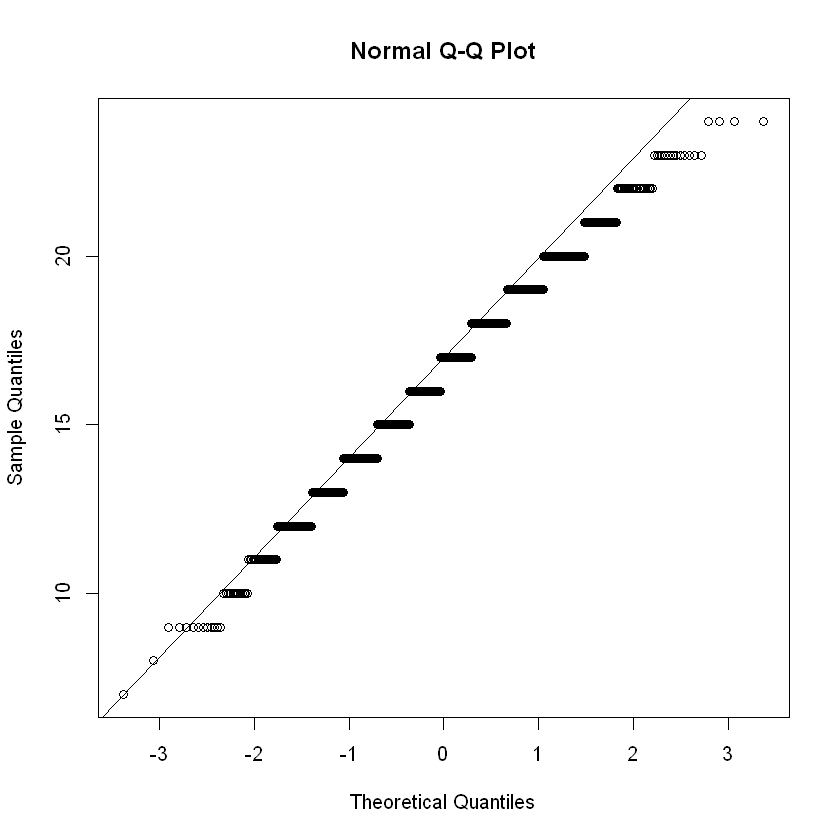

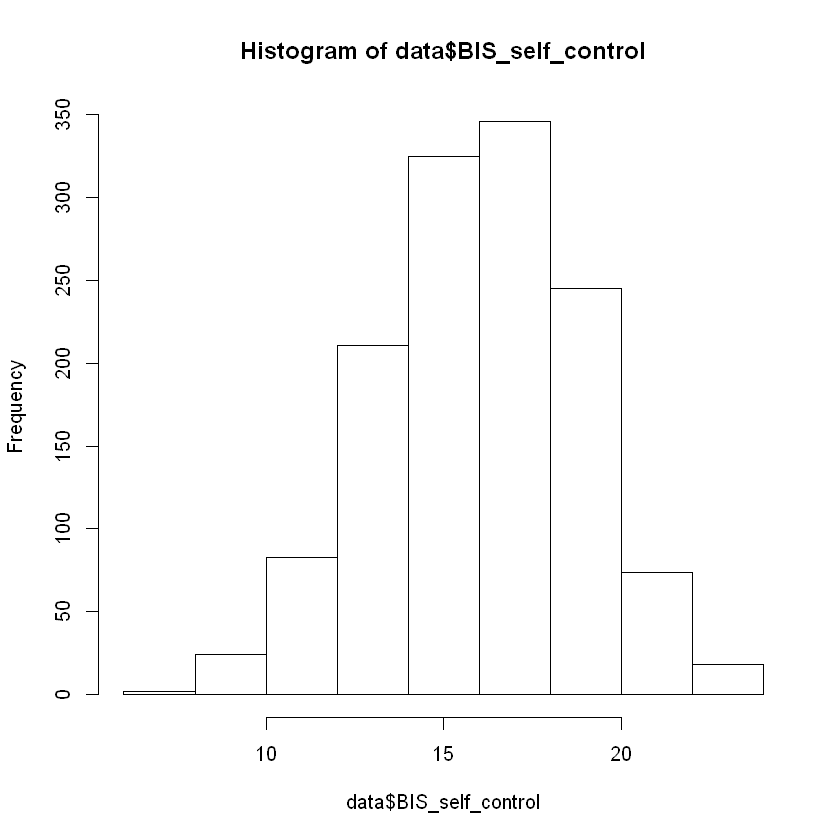

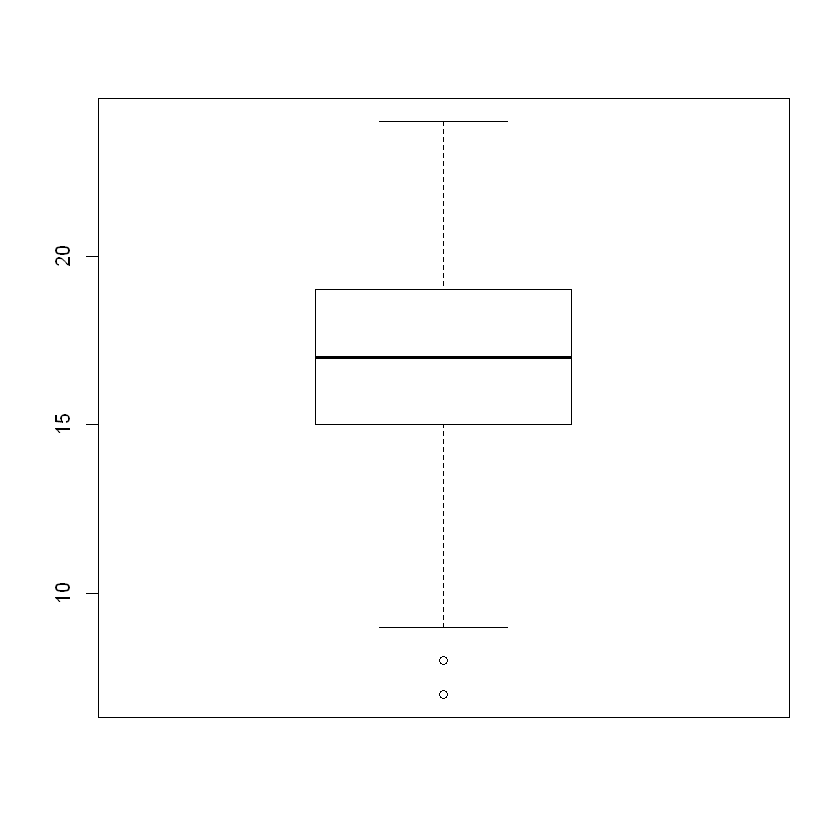

In [81]:
library(psych)
describe(data$BIS_self_control)

qqnorm(data$BIS_self_control)
qqline(data$BIS_self_control)

hist(data$BIS_self_control)
boxplot(data$BIS_self_control)




#### Comments
Not a prefert fit,but should still work without transmations. There is a few outliners, but I don't see them being an issue. 

---


### 3. Checking distribution of car accidents

,vars,n,mean,sd,median,trimmed,mad,min,max,range,skew,kurtosis,se
X1,1,1328,0.122741,0.3833313,0,0.008458647,0,0,4,4,3.672876,17.16372,0.01051902


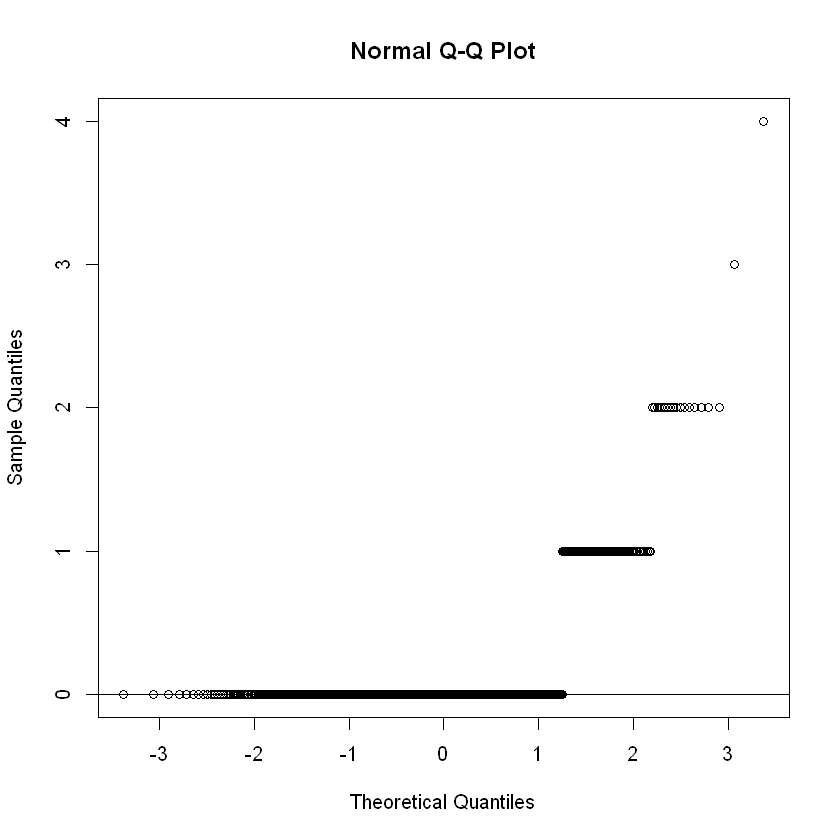

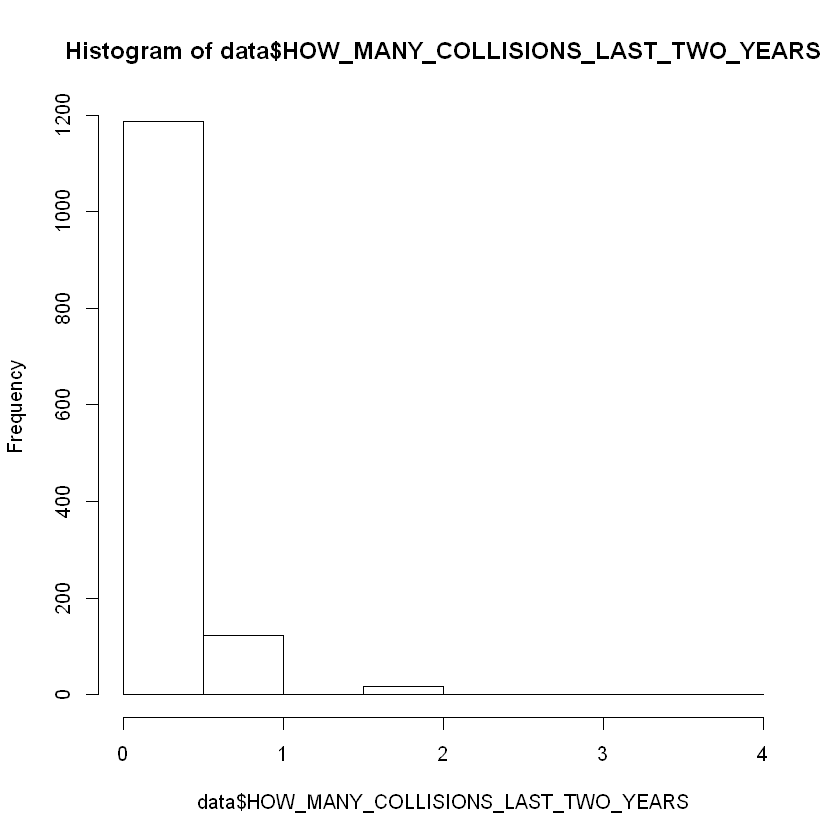

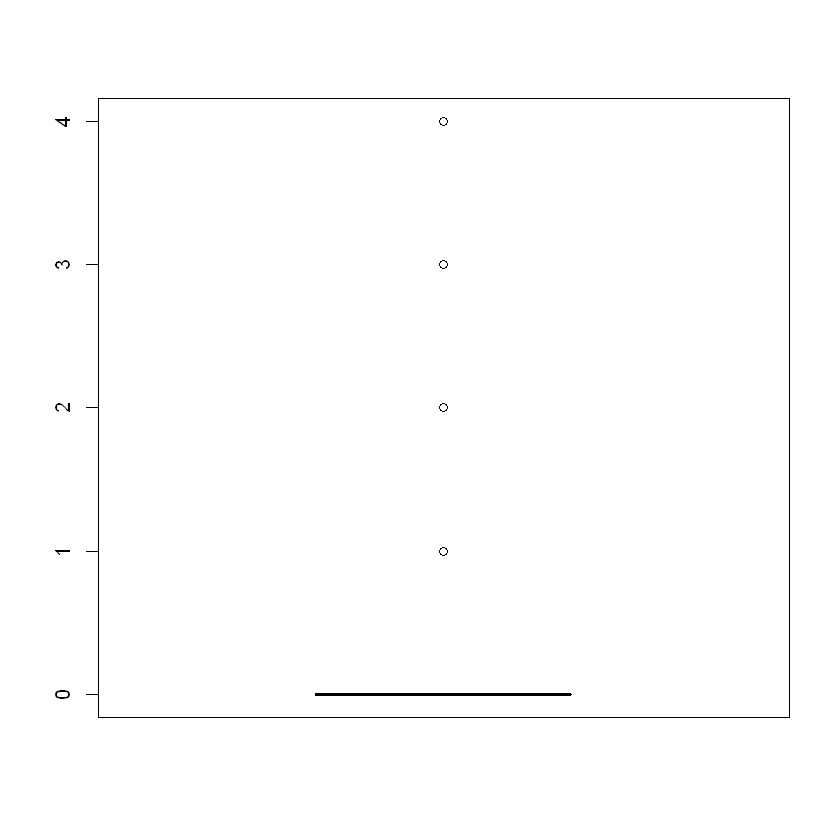

In [82]:
library(psych)
describe(data$HOW_MANY_COLLISIONS_LAST_TWO_YEARS)

qqnorm(data$HOW_MANY_COLLISIONS_LAST_TWO_YEARS)
qqline(data$HOW_MANY_COLLISIONS_LAST_TWO_YEARS)

hist(data$HOW_MANY_COLLISIONS_LAST_TWO_YEARS)
boxplot(data$HOW_MANY_COLLISIONS_LAST_TWO_YEARS)








#### Comments 
This is not good, lots of 0 values. But let's see going forward 

------

### 4. Comparing Self control to car crashes 

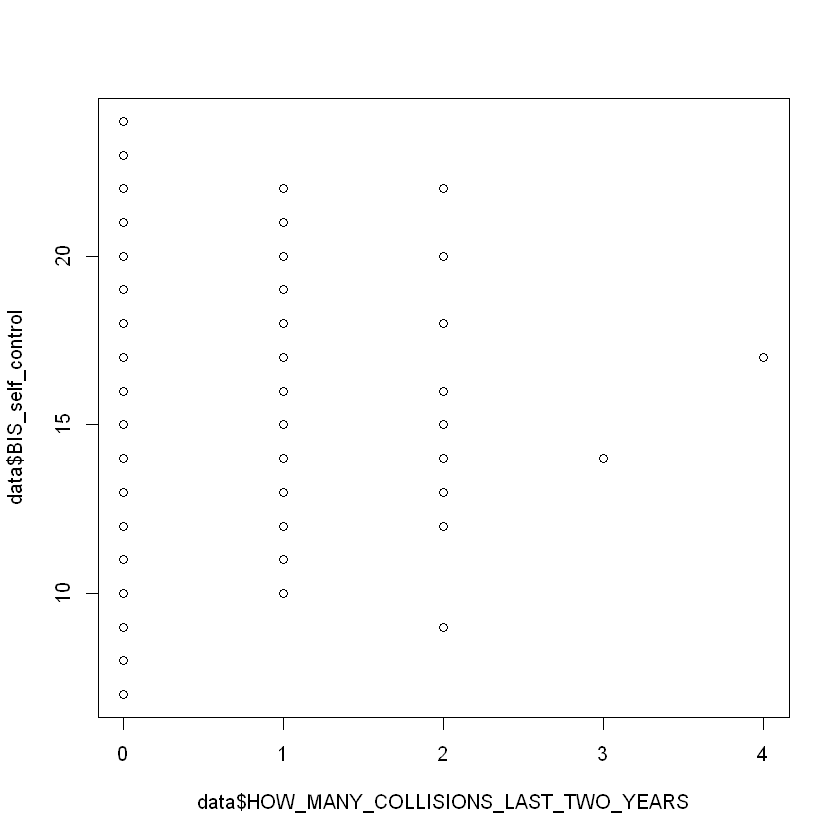

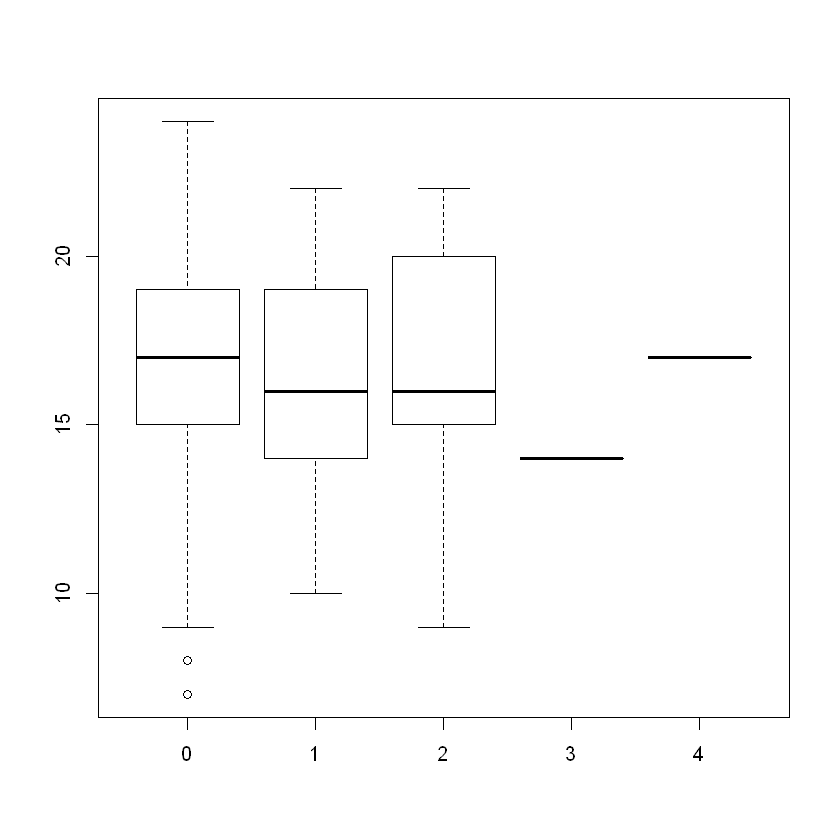

In [83]:
plot(data$HOW_MANY_COLLISIONS_LAST_TWO_YEARS,data$BIS_self_control,)
boxplot(data$BIS_self_control~data$HOW_MANY_COLLISIONS_LAST_TWO_YEARS)


#### Comment
It would appear that there might be a difference in the groups. It looks like there is very little difference between 1 crash, and 2 crash. But there might be a difference between zero crashes and any number of crashes. If we recode the varibles into two dummy categories. 0 for no crashes, and 1 for any number of crashes (1,2,3,4). We might see something interesting 

It's important to note here that we have shockly uneven sample size. 

In [86]:
#Create new varible in the dataframe called crash, and recode varibles 
data["Crash"] <- 0
data$Crash[data$HOW_MANY_COLLISIONS_LAST_TWO_YEARS == "0"] <- "0"
data$Crash[data$HOW_MANY_COLLISIONS_LAST_TWO_YEARS == "1"] <- "1"
data$Crash[data$HOW_MANY_COLLISIONS_LAST_TWO_YEARS == "2"] <- "1"
data$Crash[data$HOW_MANY_COLLISIONS_LAST_TWO_YEARS == "3"] <- "1"
data$Crash[data$HOW_MANY_COLLISIONS_LAST_TWO_YEARS == "4"] <- "1"




Our first test is a standard ANOVA. 

                   Df Sum Sq Mean Sq F value Pr(>F)
as.factor(Crash)    1      4   3.536    0.44  0.507
Residuals        1326  10654   8.034               


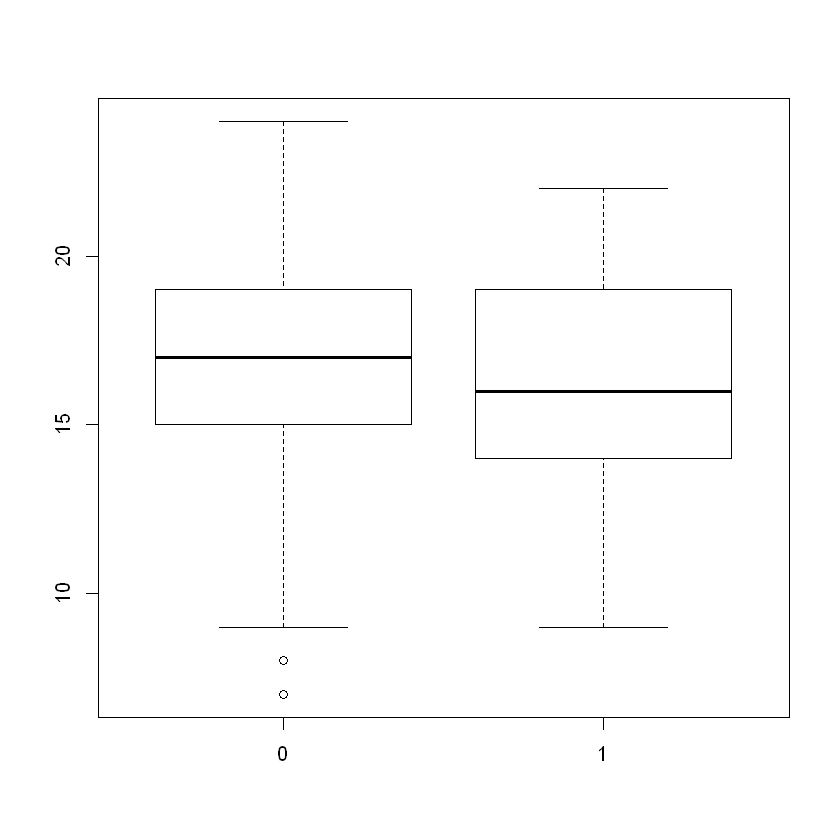

In [87]:
fit <- aov(BIS_self_control ~ as.factor(Crash), data=data)
print(summary(fit))

boxplot(data$BIS_self_control~data$Crash)



#### Comments 
Firstly, we note that the ANOVA did not reject the hypothesis. 
We also have two voliations of the assumptions for ANOVA. 
* Very unequal sample size, which we can't really fix. 
* Outliners in both of the dummy groups. Which we could fix, but is not really worth it considering the volation of the group size. 

------

We attempt a Wilcoxon rank test in order to move around these volations 

In [88]:
nrow(data)

[1] 1328

In [91]:
wilcox.test(data$BIS_self_control~as.factor(data$Crash)) 


	Wilcoxon rank sum test with continuity correction

data:  data$BIS_self_control by as.factor(data$Crash)
W = 86966, p-value = 0.4433
alternative hypothesis: true location shift is not equal to 0


#### Comments 
P value is still very high. Even if there is a difference, it would appear to be only by one point or so

------
Finally, we try a linear regression model 


In [92]:
mm<-lm(BIS_self_control~as.factor(Crash),data=data,na.action=na.omit)

summary(mm)


Call:
lm(formula = BIS_self_control ~ as.factor(Crash), data = data, 
    na.action = na.omit)

Residuals:
    Min      1Q  Median      3Q     Max 
-9.5434 -1.5434  0.4566  2.4566  7.4566 

Coefficients:
                  Estimate Std. Error t value Pr(>|t|)    
(Intercept)       16.54339    0.08227 201.082   <2e-16 ***
as.factor(Crash)1 -0.16750    0.25249  -0.663    0.507    
---
Signif. codes:  0 '***' 0.001 '**' 0.01 '*' 0.05 '.' 0.1 ' ' 1

Residual standard error: 2.834 on 1326 degrees of freedom
Multiple R-squared:  0.0003318,	Adjusted R-squared:  -0.0004221 
F-statistic: 0.4401 on 1 and 1326 DF,  p-value: 0.5072


## 5. Summary 
In summary, we can say that there is no signficant interaction of BIS Self Control and the number of car crash an individual has. 